In [1]:
from pandas import read_csv
import numpy as np
import seaborn as sns

# Задача 1. Уникальные ip


Дан файл `access_log.txt`, строки которого начинаются с ip пользователей. Найти:

1. количество уникальных ip
2. 5 самых часто встречающихся и то, сколько раз они встречаются.

In [22]:
access_log = read_csv('access_log.txt', sep= ' - - ', header= None, names= ['IP', 'request'], engine= 'python')
access_log

,IP,request
0,13.66.139.0,"[19/Dec/2020:13:57:26 +0100] ""GET /index.php?o..."
1,157.48.153.185,"[19/Dec/2020:14:08:06 +0100] ""GET /apache-log/..."
2,157.48.153.185,"[19/Dec/2020:14:08:08 +0100] ""GET /favicon.ico..."
3,216.244.66.230,"[19/Dec/2020:14:14:26 +0100] ""GET /robots.txt ..."
4,54.36.148.92,"[19/Dec/2020:14:16:44 +0100] ""GET /index.php?o..."
...,...,...
100574,193.106.31.130,"[22/Jan/2021:00:46:58 +0100] ""POST /administra..."
100575,193.106.31.130,"[22/Jan/2021:00:46:58 +0100] ""POST /administra..."
100576,193.106.31.130,"[22/Jan/2021:00:46:58 +0100] ""POST /administra..."
100577,193.106.31.130,"[22/Jan/2021:00:46:59 +0100] ""POST /administra..."


In [25]:
def calc_access_log(data):
    # функция выводит на печать данные из задания
    n_unique_data = data.nunique()
    top_ip = data.value_counts().head()
    print('1) Количество уникальных ip: {} шт.\n\n2) 5 самых часто встречающихся и то, сколько раз они встречаются: \n\n{}'.format(n_unique_data, top_ip))

calc_access_log(access_log['IP'])

1) Количество уникальных ip: 2298 шт.

2) 5 самых часто встречающихся и то, сколько раз они встречаются: 

IP
193.106.31.130    44978
173.255.176.5      5220
178.44.47.170      2824
51.210.183.78      2684
45.15.143.155      1927
Name: count, dtype: int64


# Задача 2. Класс

Напишите класс для интегрирования функций одной переменной без особенностей на конечном интервале. 
Что у класса должно быть: 
    
1. Выбор способа интегрирование: `trapeze` и `rectangle` (интегрирование методом трапеций и прямоугольников соответственно)
    
2. Явное указание интервала интегрирования и количества отрезков, на которые этот интервал разбивается

3. Возможность передать любую функцию одной переменной (которая на вход принимает вещественное число и возвращает тоже вещественное число), предполагается, что функция особенностей не имеет


Пример вызова:

    trapeze_integrator = Integrator(-1, 1, 1000, 'trapeze')

    x3 = lambda x: x\*\*3

    trapeze_integrator.integrate(x3)
    
Ну и результат такого интегрирования должен быть разумным) Для примера должно получиться что-то около 0.

In [139]:
class Integrator:
    
    def __init__(self, a, b, nseg, method):
        self.a = a
        self.b = b
        self.nseg = nseg
        self.method = method

    def integrate(self, func):
        result = 0
        if self.method == 'trapeze':
            dx = 1.0 * (self.b - self.a) / self.nseg
            sum = 0.5 * (func(self.a) + func(self.b))
            for i in range(1, self.nseg):
                sum += func(self.a + i * dx)
            result = sum * dx

        elif self.method == 'rectangle':
            dx = 1.0 * (self.b - self.a) / self.nseg
            sum = 0.0
            xstart = self.a + 0.5 * dx
            for i in range(self.nseg):
                sum += func(xstart + i * dx)
            result = sum * dx

        return result    

In [142]:
trapeze_integrator = Integrator(-1, 1, 1000, 'trapeze')
x3 = lambda x: x**(3/2)
trapeze_integrator.integrate(x3)

(0.40000049544107696-0.40000049544107724j)

# Задача 3. NumPy

Вам дан массив с числами размера $x*n$ (это размер столбца) на $m$. Напишите функцию `bucket_aggregate(arr: np.array, x: int)-> np.array`, которая делает следующее преобразование:

Каждый столбец разбивается на x бакетов одинаковой длины n и внутри каждого бакета считается среднее значение.
На выходе получается массив размера $n$ на $m$. Гарантируется, что длина столбца входного массива нацело делится на x. ("корректную" работу для массива 10\*10 и 3 бакетов предусматривать не обязательно). Ошибки вычислений, связанные с ограниченной точностью типа Float, пытаться вылечить не обязательно.

**Пример**

**Вход**

Массив **a**

1 1 1

2 3 3

4 5 6
 
1 2 3


**Применение**

    bucket_aggregate(a, 2)
    
**Выход**

1.5 2   2

2.5 3.5 4.5



In [126]:
def bucket_aggregate(arr: np.array, x: int)-> np.array:
    n = len(arr) // x
    m = len(arr[0])
    result = np.array([[float(0)] * m] * x)
    for i in range(len(result)):
        for j in range(len(result[0])):
            result[i][j] = (arr[i*2][j] + arr[i*2+1][j]) / n
    return result

print(bucket_aggregate([[1, 1, 1], [2, 3, 3], [4, 5, 6], [1, 2, 3]], 2))

[[1.5 2.  2. ]
 [2.5 3.5 4.5]]


# Задача 4. Про pandas

Дан датафрейм, содержащий распаршенную с сайта reverb информацию об объявлениях о продаже электрогитар.
Поля там такие:

`title` - заголовок объявления
`description` и `text` - что-то из описания объявления
`price` - цена в долларах
`params_dict` - словарь параметров (чтобы считать его, можете воспользоваться `eval`)

Вопросы:

1. Сколько возможных ключей есть в params_dict
2. Какой инструмент самый дорогой и сколько он стоит
3. Какой самый частый бренд (если известен)
4. Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как? (ответом будет график)

In [12]:
reverd = read_csv('reverb.csv', index_col= 0)

# ПРЕПРОЦЕССИНГ

# преобразуем param_dict
reverd['param_dict_clean'] = [eval(reverd['param_dict'][i]) for i in range(len(reverd['param_dict']))]

# бренд гитар в отдельную переменную
reverd['brand_guitar'] = list(map(lambda x: x.get('Brand'), reverd['param_dict_clean']))

# год гитар в отдельную переменную
reverd['year_guitar'] = list(map(lambda x: x.get('Year'), reverd['param_dict_clean']))

# преобразуем price
str_punc = "[!#$%&'()*+,/:;<=>?@[\]^_`{|}~—\"\-]+—/"
def data_preprocessing(text):
    text = float(''.join([c for c in text if c not in str_punc]))    
    return text

# преобразованная цена
reverd['price_clean'] = reverd['price'].apply(data_preprocessing)

In [13]:
# 1) сколько возможных ключей есть в param_dict

# переменная, хранящая ключи param_dict
keys_params = reverd['param_dict_clean'].apply(lambda x: list(x.keys()))

# переменная хранящая ключи в виде множества
set_params = set(keys_params[0])

for i in keys_params:
    set_params.update(i)

print('В param_dict есть {} уникальных ключа'.format(len(set_params)))

В param_dict есть 33 уникальных ключа


In [14]:
# 2) какой инструмент самый дорогой и сколько он стоит

# индекс самой дорогой гитары
index_max_price = list(reverd.index[reverd['price_clean'] == reverd['price_clean'].max()])[0]

# параметры самой дорогой гитары
max_price_guitar = eval(reverd['param_dict'][index_max_price])

# добавляем к парамметрам цену 
max_price_guitar['Price'] = reverd['price'][index_max_price]

print("Самая дорогая гитара:")
print()
for key, value in max_price_guitar.items():
  print("{0}: {1}".format(key,value))


Самая дорогая гитара:

Condition: Mint (Used)Mint items are in essentially new original condition but have been opened or played.learn more
Brand: Gibson
Model: Eric Clapton
Made In: United States
Price: $387,363.74


In [15]:
# 3) какой самый частый бренд
max_count_guitar = reverd['brand_guitar'].value_counts().head(1).index[0]

print(f'Самый частый бренд гитар: {max_count_guitar}')

Самый частый бренд гитар: Fender


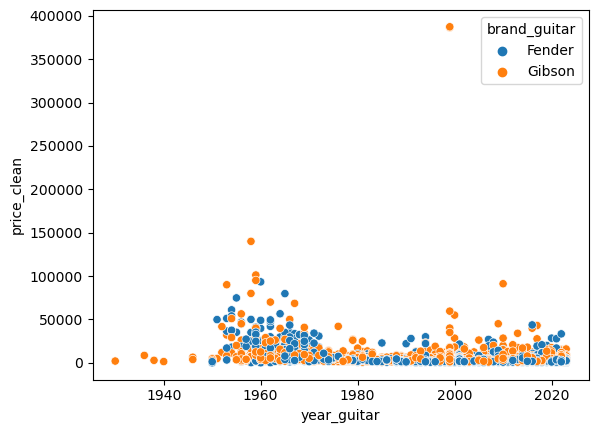

In [20]:
# 4) можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? Если да, то как?
fender_and_gibson_guitar = reverd[(reverd['brand_guitar'] == 'Fender') | (reverd['brand_guitar'] == 'Gibson')][['brand_guitar', 'year_guitar',	'price_clean']]

# вычищаем year_guitar для анализа
str_punc = "[!#$%&'()*+,./:;<=>?@[\] ^_`{|}~’～—\"\]-+—/"
def data_preprocessing(text):
    try:
        text = ''.join([c for c in text if c not in str_punc])
        text = ''.join(i for i in text if not i.isalpha())
        text = '%.4s' % text
        if (len(text) < 3) and (int(text) % 100 > 30):
            text = '19' + text
        elif (len(text) == 4) and (int(text) // 100 > 20):
            text = '19' + text[0:2]
        elif (len(text) == 4) and (int(text) // 100 < 19):
            text = '19' + text[-2:]
        elif (len(text) == 1):
            text = '200' + text
        text = int(text)
    except:
        text = None
    return text

# применяем функцию очистки
fender_and_gibson_guitar['year_guitar'] = fender_and_gibson_guitar['year_guitar'].apply(data_preprocessing)

# заполняем пропуски после очистки
fender_and_gibson_guitar['year_guitar'] = fender_and_gibson_guitar.groupby('brand_guitar')['year_guitar'].transform(lambda x: x.fillna(int(x.mean())))

# график
sns.scatterplot(
    data= fender_and_gibson_guitar, 
    x= "year_guitar", 
    y= "price_clean", 
    hue= "brand_guitar"
    );

# Задача 5. Про парсинг информации

Есть сайт https://nplus1.ru/ , новости за дату на нем можно увидеть на страницах типа https://nplus1.ru/news/2023/03/28

Используя парсер, посчитайте суммарную длину текстов статей (в количестве слов или в количестве символов, как вам будет удобнее), которые были на N+1 в списке новостей в Июле 2023 года (пройтись по всем датам июля, собрать тексты статей, посчитать длину в словах/символах). 

Пользуйтесь любыми удобными вам библиотеками